#### Cai 2022 PFMC abridged QC

**Objective**: Run QC steps without normalisation/UMAP for Cai 2022 PBMC data

- **Developed by**: Mairi McClean
- **Affiliation**: Institute of Computational Biology, Helmholtz Zentrum Munich
- **v230306**

### Import required modules

In [1]:
import anndata
import logging
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scrublet as scr
import pybiomart as biomart
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams

#### Log file and figure output settings

In [2]:
%matplotlib inline
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')

-----
anndata     0.9.1
scanpy      1.9.3
-----
CoreFoundation      NA
Foundation          NA
PIL                 9.5.0
PyObjCTools         NA
anyio               NA
appnope             0.1.3
asttokens           NA
attr                23.1.0
babel               2.12.1
backcall            0.2.0
certifi             2023.05.07
cffi                1.15.1
charset_normalizer  3.1.0
cloudpickle         2.2.1
colorama            0.4.6
comm                0.1.3
cycler              0.10.0
cython_runtime      NA
cytoolz             0.12.0
dask                2023.5.1
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.1
defusedxml          0.7.1
executing           1.2.0
fastjsonschema      NA
future              0.18.3
h5py                3.8.0
idna                3.4
igraph              0.10.4
importlib_resources NA
ipykernel           6.23.1
jedi                0.18.2
jinja2              3.1.2
joblib              1.2.0
json5               NA
jsonschema          4.17.3
j

### Read in dataset

In [3]:
adata = sc.read_h5ad('/Volumes/Expansion/data_lake/INBOX/tb_cc/raw_data_objects/single_cell/human/cai2022/CaiY2022_TB.raw.h5ad')
adata

AnnData object with n_obs × n_vars = 223089 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol'
    var: 'gene_name'

In [4]:
adata.obs

study individual     sample  \
barcode                                                                     
AAACCTGAGAGGTTAT-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
AAACCTGAGGCGTACA-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
AAACCTGAGGGTCGAT-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
AAACCTGAGGTGGGTT-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
AAACCTGAGGTGTGGT-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
...                                             ...        ...        ...   
TTTGTCATCGCCTGTT-HRS100514-pfmc_scTCRseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTAACTCT-HRS100514-pfmc_scTCRseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTCGTTTA-HRS100514-pfmc_scTCRseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTGGTGTA-HRS100514-pfmc_scTCRseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTTGTCAT-HRS100514-pfmc_scTCRseq  CaiY_2022  HRI068293  HRS100514   

                                         tissue donor data_type  \
barcode                                                           
AAACCTGAGAGGTTAT-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
AAACCTGAGGCGTACA-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
AAACCTGAGGGTCGAT-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
AAACCTGAGGTGGGTT-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
AAACCTGAGGTGTGGT-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
...                                         ...   ...       ...   
TTTGTCATCGCCTGTT-HRS100514-pfmc_scTCRseq   PFMC    P4  scTCRseq   
TTTGTCATCTAACTCT-HRS100514-pfmc_scTCRseq   PFMC    P4  scTCRseq   
TTTGTCATCTCGTTTA-HRS100514-pfmc_scTCRseq   PFMC    P4  scTCRseq   
TTTGTCATCTGGTGTA-HRS100514-pfmc_scTCRseq   PFMC    P4  scTCRseq   
TTTGTCATCTTGTCAT-HRS100514-pfmc_scTCRseq   PFMC    P4  scTCRseq   

                                                       centre version  \
barcode                                                                 
AAACCTGAGAGGTTAT-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
AAACCTGAGGCGTACA-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
AAACCTGAGGGTCGAT-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
AAACCTGAGGTGGGTT-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
AAACCTGAGGTGTGGT-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
...                                                       ...     ...   
TTTGTCATCGCCTGTT-HRS100514-pfmc_scTCRseq  Shenzhen University   10XV2   
TTTGTCATCTAACTCT-HRS100514-pfmc_scTCRseq  Shenzhen University   10XV2   
TTTGTCATCTCGTTTA-HRS100514-pfmc_scTCRseq  Shenzhen University   10XV2   
TTTGTCATCTGGTGTA-HRS100514-pfmc_scTCRseq  Shenzhen University   10XV2   
TTTGTCATCTTGTCAT-HRS100514-pfmc_scTCRseq  Shenzhen University   10XV2   

                                             object       protocol  
barcode                                                             
AAACCTGAGAGGTTAT-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq  
AAACCTGAGGCGTACA-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq  
AAACCTGAGGGTCGAT-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq  
AAACCTGAGGTGGGTT-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq  
AAACCTGAGGTGTGGT-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq  
...                                             ...            ...  
TTTGTCATCGCCTGTT-HRS100514-pfmc_scTCRseq  HRS100514  pfmc_scTCRseq  
TTTGTCATCTAACTCT-HRS100514-pfmc_scTCRseq  HRS100514  pfmc_scTCRseq  
TTTGTCATCTCGTTTA-HRS100514-pfmc_scTCRseq  HRS100514  pfmc_scTCRseq  
TTTGTCATCTGGTGTA-HRS100514-pfmc_scTCRseq  HRS100514  pfmc_scTCRseq  
TTTGTCATCTTGTCAT-HRS100514-pfmc_scTCRseq  HRS100514  pfmc_scTCRseq  

[223089 rows x 10 columns]

### Subset object by protocol and tissue type

In [5]:
adata.obs['data_type'].value_counts()

data_type
scRNAseq    146168
scTCRseq     76921
Name: count, dtype: int64

In [6]:
adata.obs['tissue'].value_counts()

tissue
PBMC    127097
PFMC     95992
Name: count, dtype: int64

In [7]:
adata_new = adata[~adata.obs['tissue'].isin(['PBMC']),:]
adata_new

View of AnnData object with n_obs × n_vars = 95992 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol'
    var: 'gene_name'

In [8]:
adata_new.obs['tissue'].value_counts()

tissue
PFMC    95992
Name: count, dtype: int64

In [9]:
adata_new_2 = adata_new[~adata_new.obs['data_type'].isin(['scTCRseq']),:]

In [10]:
adata_new_2.obs['data_type'].value_counts()

data_type
scRNAseq    68269
Name: count, dtype: int64

In [11]:
adata_new_2.obs['tissue'].value_counts()

tissue
PFMC    68269
Name: count, dtype: int64

### Make names unique

In [12]:
adata_new_2.var_names_make_unique()
sample_object = adata_new_2.copy()
sample_object

AnnData object with n_obs × n_vars = 68269 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol'
    var: 'gene_name'

### Replace gene symbols

In [13]:
sample_object.var['gene_id'] = sample_object.var.index.copy()
sample_object.var.set_index('gene_name', inplace = True)
sample_object.var.head()

gene_id
gene_name                     
DDX11L1      ENSG00000223972.5
WASH7P       ENSG00000227232.5
MIR6859-1    ENSG00000278267.1
MIR1302-2HG  ENSG00000243485.5
MIR1302-2    ENSG00000284332.1

In [14]:
sample_object.var_names = [str(i) for i in sample_object.var_names]
sample_object.var_names_make_unique()

/Users/mairi.mcclean/mambaforge/envs/new_scanpy_local/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


### Top 20 scatterplot

normalizing counts per cell
    finished (0:00:00)


/Users/mairi.mcclean/mambaforge/envs/new_scanpy_local/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


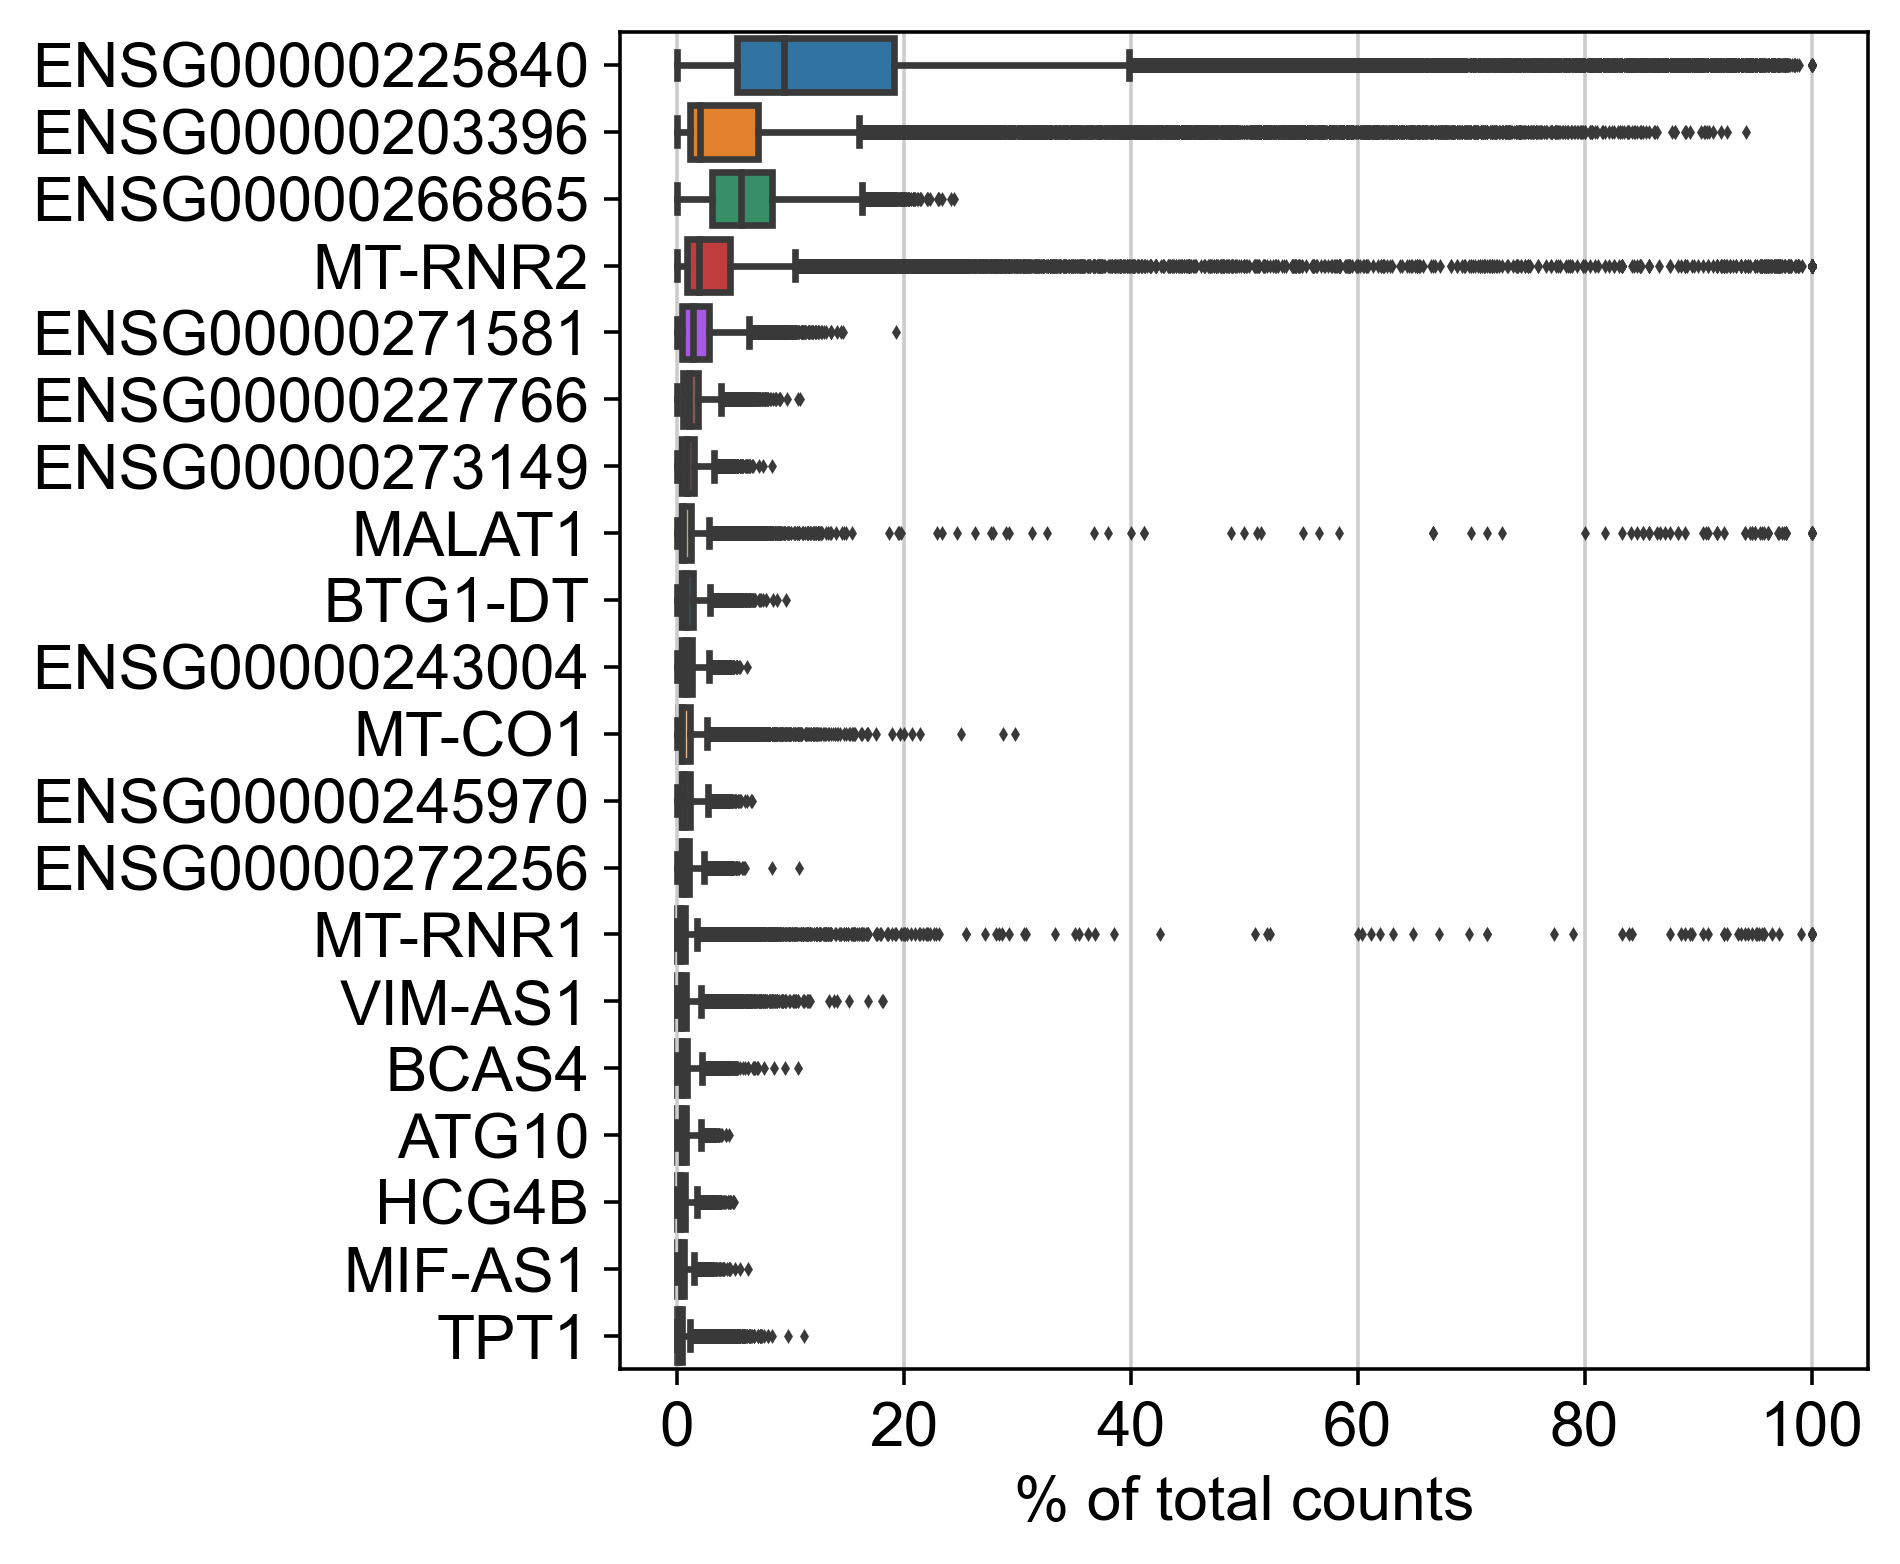

In [15]:
# highest fraction of counts per cell

sc.pl.highest_expr_genes(sample_object, n_top=20)

### Initial filtering

- By gene

In [16]:
sc.pp.filter_cells(sample_object, min_genes = 200)
print(sample_object.n_obs, sample_object.n_vars)

filtered out 27126 cells that have less than 200 genes expressed
41143 61533


In [17]:
sample_object.shape

(41143, 61533)

In [18]:
sample_object.var

gene_id
DDX11L1      ENSG00000223972.5
WASH7P       ENSG00000227232.5
MIR6859-1    ENSG00000278267.1
MIR1302-2HG  ENSG00000243485.5
MIR1302-2    ENSG00000284332.1
...                        ...
MT-ND6       ENSG00000198695.2
MT-TE        ENSG00000210194.1
MT-CYB       ENSG00000198727.2
MT-TT        ENSG00000210195.2
MT-TP        ENSG00000210196.2

[61533 rows x 1 columns]

- By gene

In [19]:
sc.pp.filter_genes(sample_object, min_cells = 3)
sample_object.shape

filtered out 28930 genes that are detected in less than 3 cells


(41143, 32603)

### QC metrics

In [20]:
sample_object.shape

(41143, 32603)

In [21]:
sample_object.var['mt'] = sample_object.var_names.str.startswith('MT-')
sample_object.var['ribo'] = sample_object.var_names.str.startswith(("RPS","RPL"))
sample_object.var["hb"] = sample_object.var_names.str.contains(("^HB[^(P)]"))
sample_object.var

gene_id  n_cells     mt   ribo     hb
DDX11L1          ENSG00000223972.5        5  False  False  False
WASH7P           ENSG00000227232.5       27  False  False  False
ENSG00000238009  ENSG00000238009.6       31  False  False  False
CICP27           ENSG00000233750.3      290  False  False  False
ENSG00000241860  ENSG00000241860.7      580  False  False  False
...                            ...      ...    ...    ...    ...
MT-ND6           ENSG00000198695.2    18635   True  False  False
MT-TE            ENSG00000210194.1      740   True  False  False
MT-CYB           ENSG00000198727.2    22356   True  False  False
MT-TT            ENSG00000210195.2       44   True  False  False
MT-TP            ENSG00000210196.2     3467   True  False  False

[32603 rows x 5 columns]

- Check values present in new columns

In [22]:
sample_object.var['mt'].value_counts()

mt
False    32566
True        37
Name: count, dtype: int64

In [23]:
sample_object.var['ribo'].value_counts()

ribo
False    32131
True       472
Name: count, dtype: int64

In [24]:
sample_object.var['hb'].value_counts()

hb
False    32600
True         3
Name: count, dtype: int64

In [25]:
sc.pp.calculate_qc_metrics(sample_object, qc_vars = ['mt', 'ribo', 'hb'], percent_top = None, log1p = False, inplace = True)

In [26]:
sample_object

AnnData object with n_obs × n_vars = 41143 × 32603
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb'
    var: 'gene_id', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

### QC visualisation

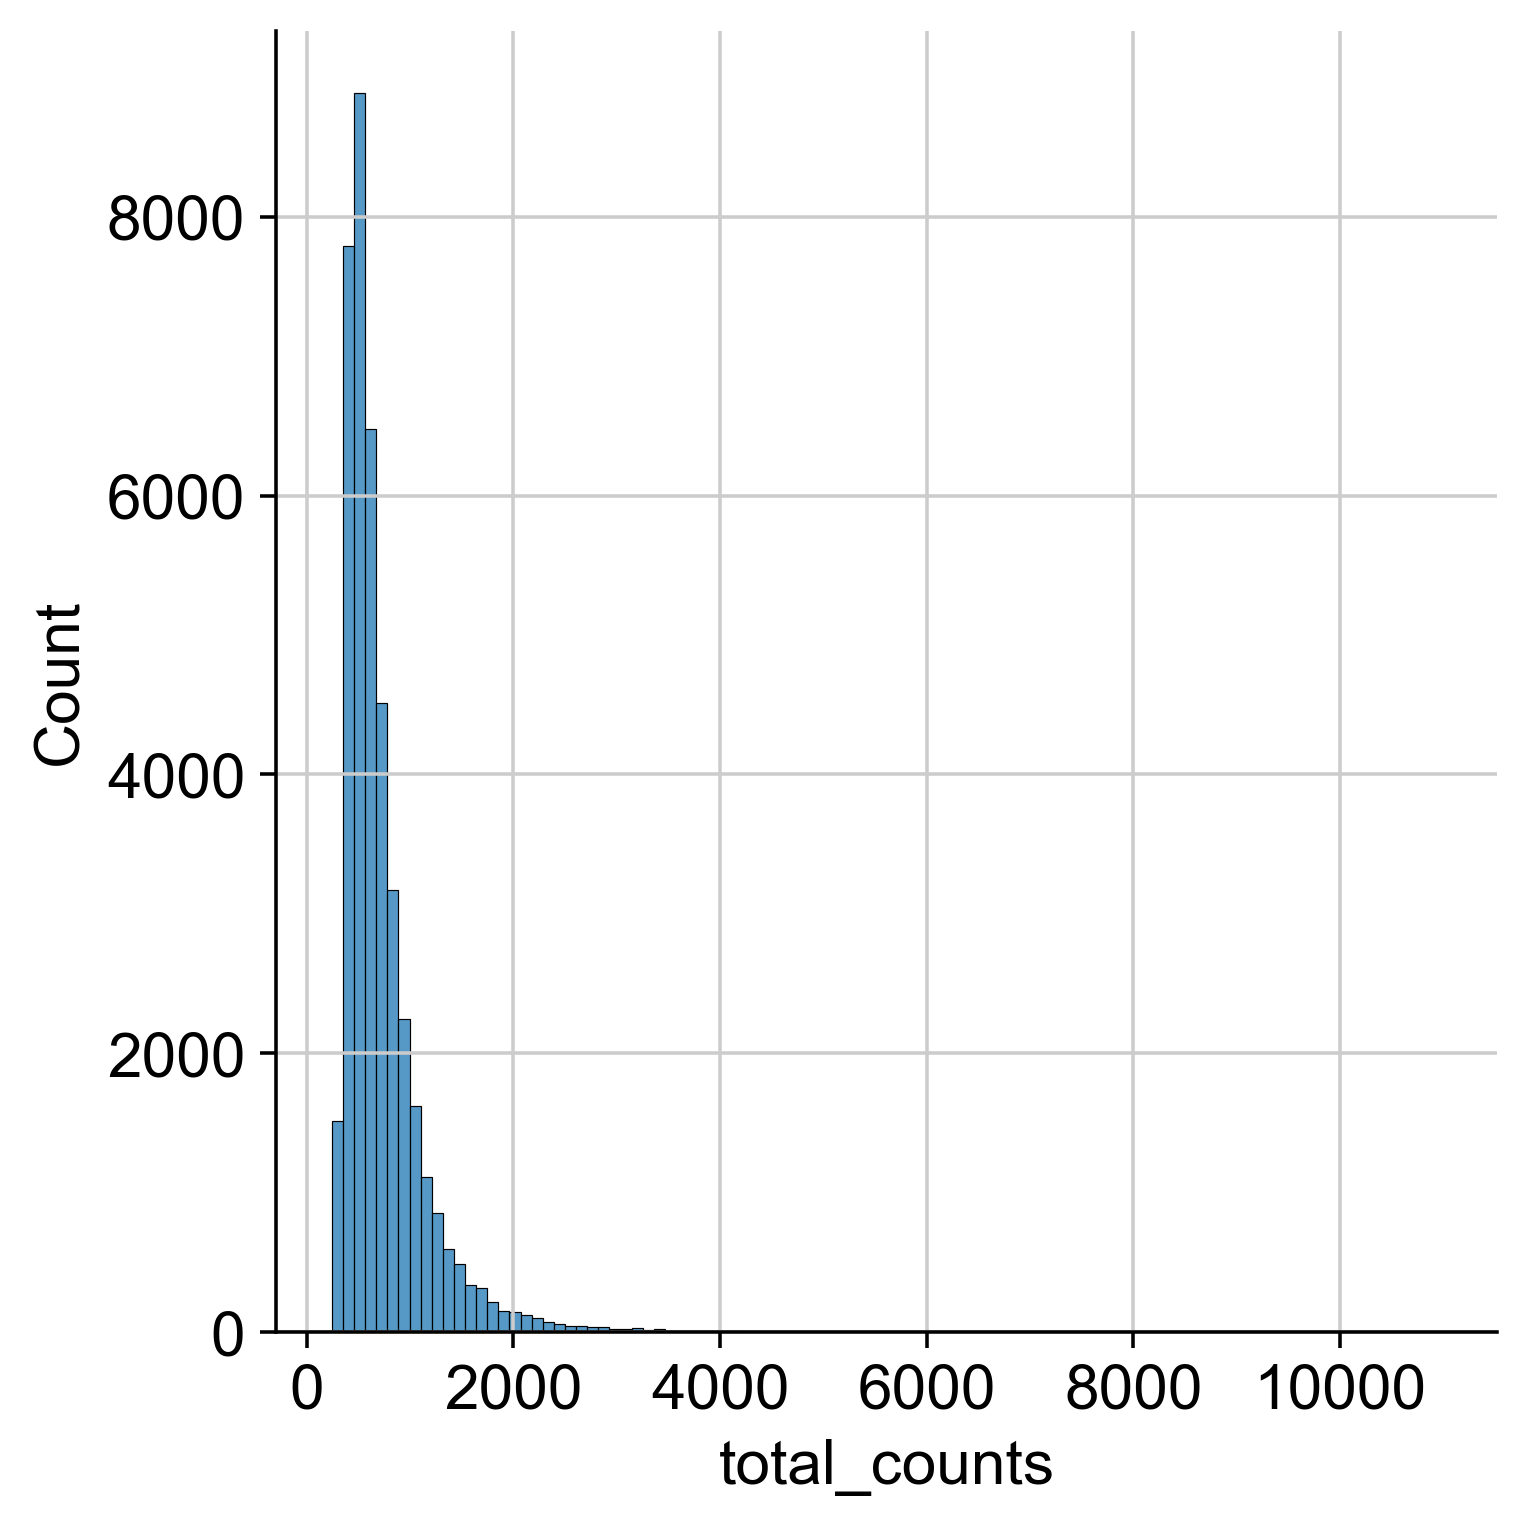

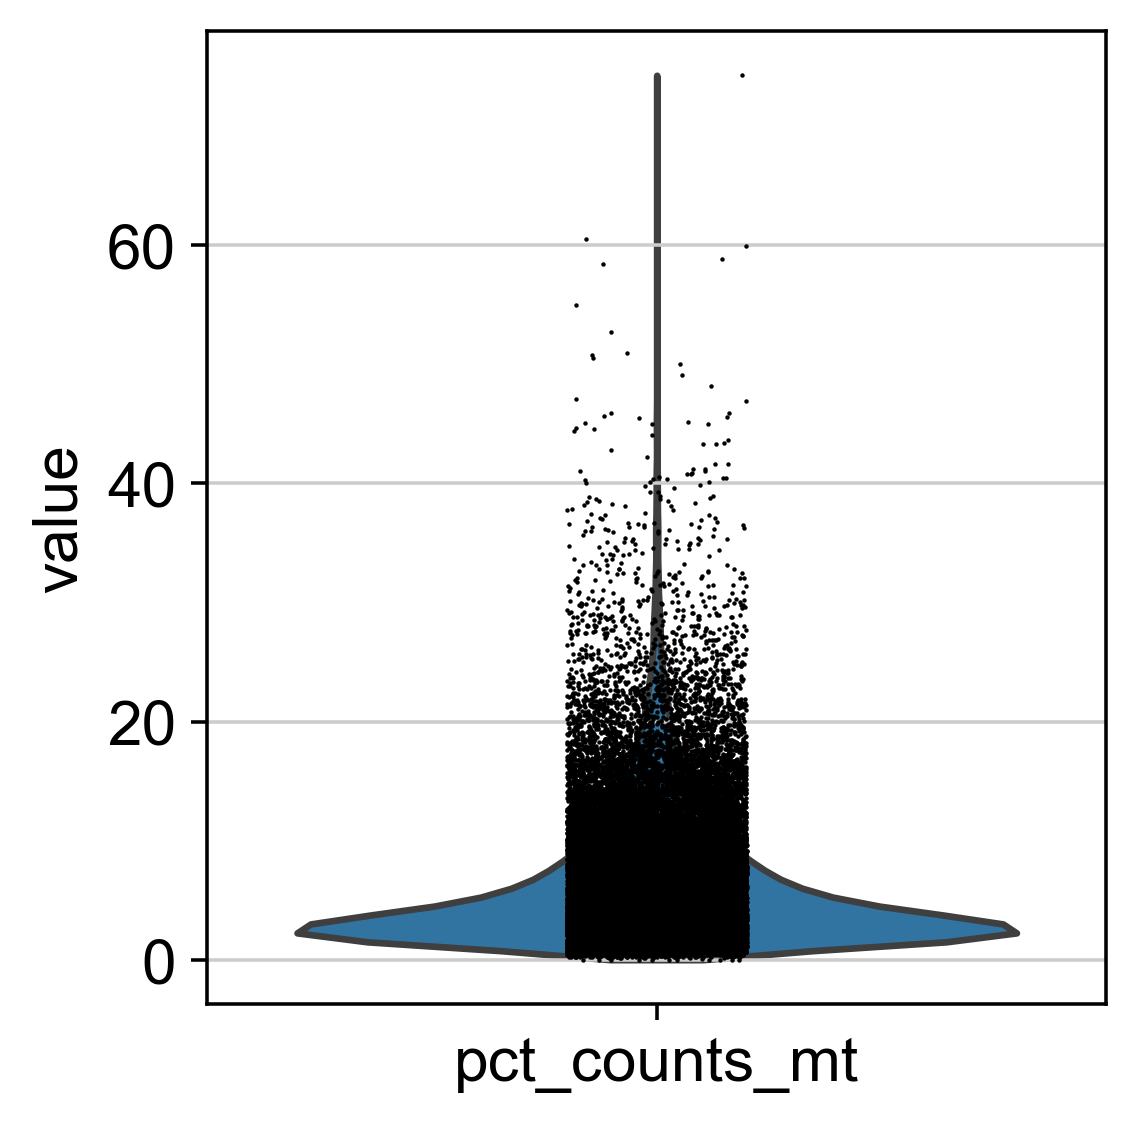

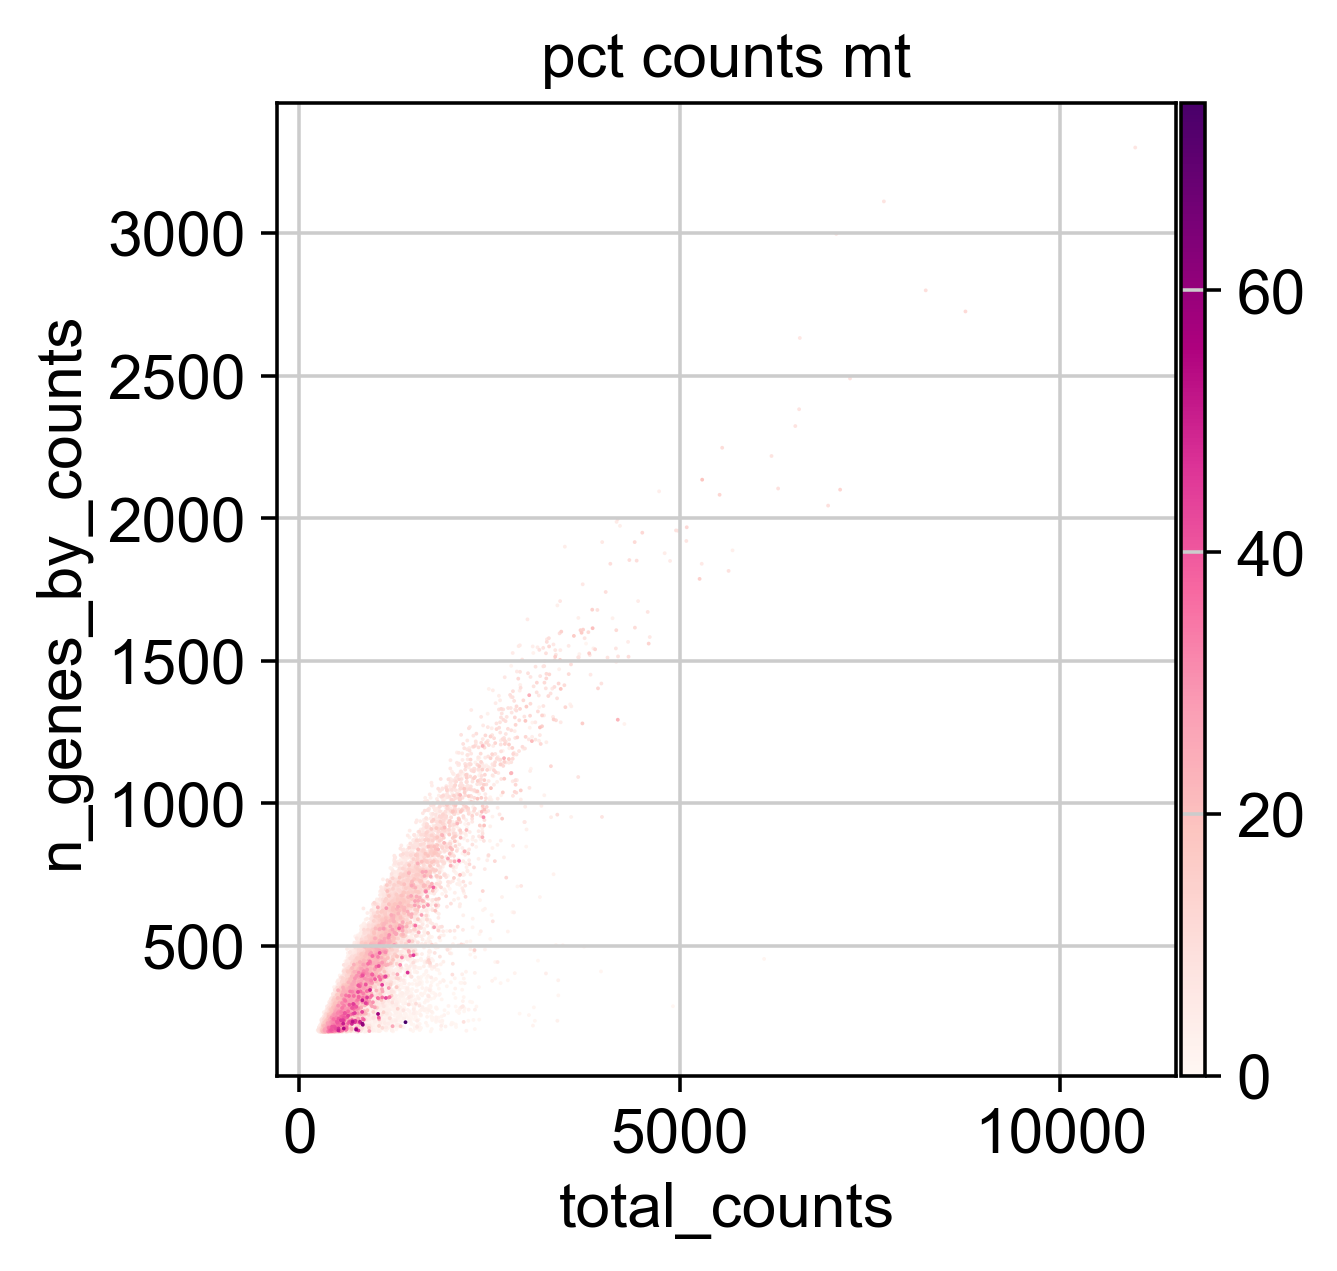

In [27]:
p1 = sns.displot(sample_object.obs["total_counts"], bins=100, kde=False)
# sc.pl.violin(adata, 'total_counts')
p2 = sc.pl.violin(sample_object, "pct_counts_mt")
p3 = sc.pl.scatter(sample_object, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [28]:
sample_object.obs

study individual     sample  \
barcode                                                                     
AAACCTGAGAACAATC-HRS180102-pfmc_scRNAseq  CaiY_2022  HRI111687  HRS180102   
AAACCTGAGGTCATCT-HRS180102-pfmc_scRNAseq  CaiY_2022  HRI111687  HRS180102   
AAACCTGTCTTACCTA-HRS180102-pfmc_scRNAseq  CaiY_2022  HRI111687  HRS180102   
AAACGGGGTTTAGGAA-HRS180102-pfmc_scRNAseq  CaiY_2022  HRI111687  HRS180102   
AAAGATGCAATAGCAA-HRS180102-pfmc_scRNAseq  CaiY_2022  HRI111687  HRS180102   
...                                             ...        ...        ...   
TTTGTCATCTAACTCT-HRS100514-pfmc_scRNAseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTCGTTTA-HRS100514-pfmc_scRNAseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTGGTGTA-HRS100514-pfmc_scRNAseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTTAGCCC-HRS100514-pfmc_scRNAseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTTGTCAT-HRS100514-pfmc_scRNAseq  CaiY_2022  HRI068293  HRS100514   

                                         tissue donor data_type  \
barcode                                                           
AAACCTGAGAACAATC-HRS180102-pfmc_scRNAseq   PFMC    P5  scRNAseq   
AAACCTGAGGTCATCT-HRS180102-pfmc_scRNAseq   PFMC    P5  scRNAseq   
AAACCTGTCTTACCTA-HRS180102-pfmc_scRNAseq   PFMC    P5  scRNAseq   
AAACGGGGTTTAGGAA-HRS180102-pfmc_scRNAseq   PFMC    P5  scRNAseq   
AAAGATGCAATAGCAA-HRS180102-pfmc_scRNAseq   PFMC    P5  scRNAseq   
...                                         ...   ...       ...   
TTTGTCATCTAACTCT-HRS100514-pfmc_scRNAseq   PFMC    P4  scRNAseq   
TTTGTCATCTCGTTTA-HRS100514-pfmc_scRNAseq   PFMC    P4  scRNAseq   
TTTGTCATCTGGTGTA-HRS100514-pfmc_scRNAseq   PFMC    P4  scRNAseq   
TTTGTCATCTTAGCCC-HRS100514-pfmc_scRNAseq   PFMC    P4  scRNAseq   
TTTGTCATCTTGTCAT-HRS100514-pfmc_scRNAseq   PFMC    P4  scRNAseq   

                                                       centre version  \
barcode                                                                 
AAACCTGAGAACAATC-HRS180102-pfmc_scRNAseq  Shenzhen University   10XV2   
AAACCTGAGGTCATCT-HRS180102-pfmc_scRNAseq  Shenzhen University   10XV2   
AAACCTGTCTTACCTA-HRS180102-pfmc_scRNAseq  Shenzhen University   10XV2   
AAACGGGGTTTAGGAA-HRS180102-pfmc_scRNAseq  Shenzhen University   10XV2   
AAAGATGCAATAGCAA-HRS180102-pfmc_scRNAseq  Shenzhen University   10XV2   
...                                                       ...     ...   
TTTGTCATCTAACTCT-HRS100514-pfmc_scRNAseq  Shenzhen University   10XV2   
TTTGTCATCTCGTTTA-HRS100514-pfmc_scRNAseq  Shenzhen University   10XV2   
TTTGTCATCTGGTGTA-HRS100514-pfmc_scRNAseq  Shenzhen University   10XV2   
TTTGTCATCTTAGCCC-HRS100514-pfmc_scRNAseq  Shenzhen University   10XV2   
TTTGTCATCTTGTCAT-HRS100514-pfmc_scRNAseq  Shenzhen University   10XV2   

                                             object       protocol  n_genes  \
barcode                                                                       
AAACCTGAGAACAATC-HRS180102-pfmc_scRNAseq  HRS180102  pfmc_scRNAseq      231   
AAACCTGAGGTCATCT-HRS180102-pfmc_scRNAseq  HRS180102  pfmc_scRNAseq      205   
AAACCTGTCTTACCTA-HRS180102-pfmc_scRNAseq  HRS180102  pfmc_scRNAseq      292   
AAACGGGGTTTAGGAA-HRS180102-pfmc_scRNAseq  HRS180102  pfmc_scRNAseq      232   
AAAGATGCAATAGCAA-HRS180102-pfmc_scRNAseq  HRS180102  pfmc_scRNAseq      236   
...                                             ...            ...      ...   
TTTGTCATCTAACTCT-HRS100514-pfmc_scRNAseq  HRS100514  pfmc_scRNAseq      568   
TTTGTCATCTCGTTTA-HRS100514-pfmc_scRNAseq  HRS100514  pfmc_scRNAseq     1094   
TTTGTCATCTGGTGTA-HRS100514-pfmc_scRNAseq  HRS100514  pfmc_scRNAseq      398   
TTTGTCATCTTAGCCC-HRS100514-pfmc_scRNAseq  HRS100514  pfmc_scRNAseq      209   
TTTGTCATCTTGTCAT-HRS100514-pfmc_scRNAseq  HRS100514  pfmc_scRNAseq      573   

                                          n_genes_by_counts  total_counts  \
barcode                                                                     
AAACCTGAGAACAATC-HRS180102-pfmc_scRNAseq

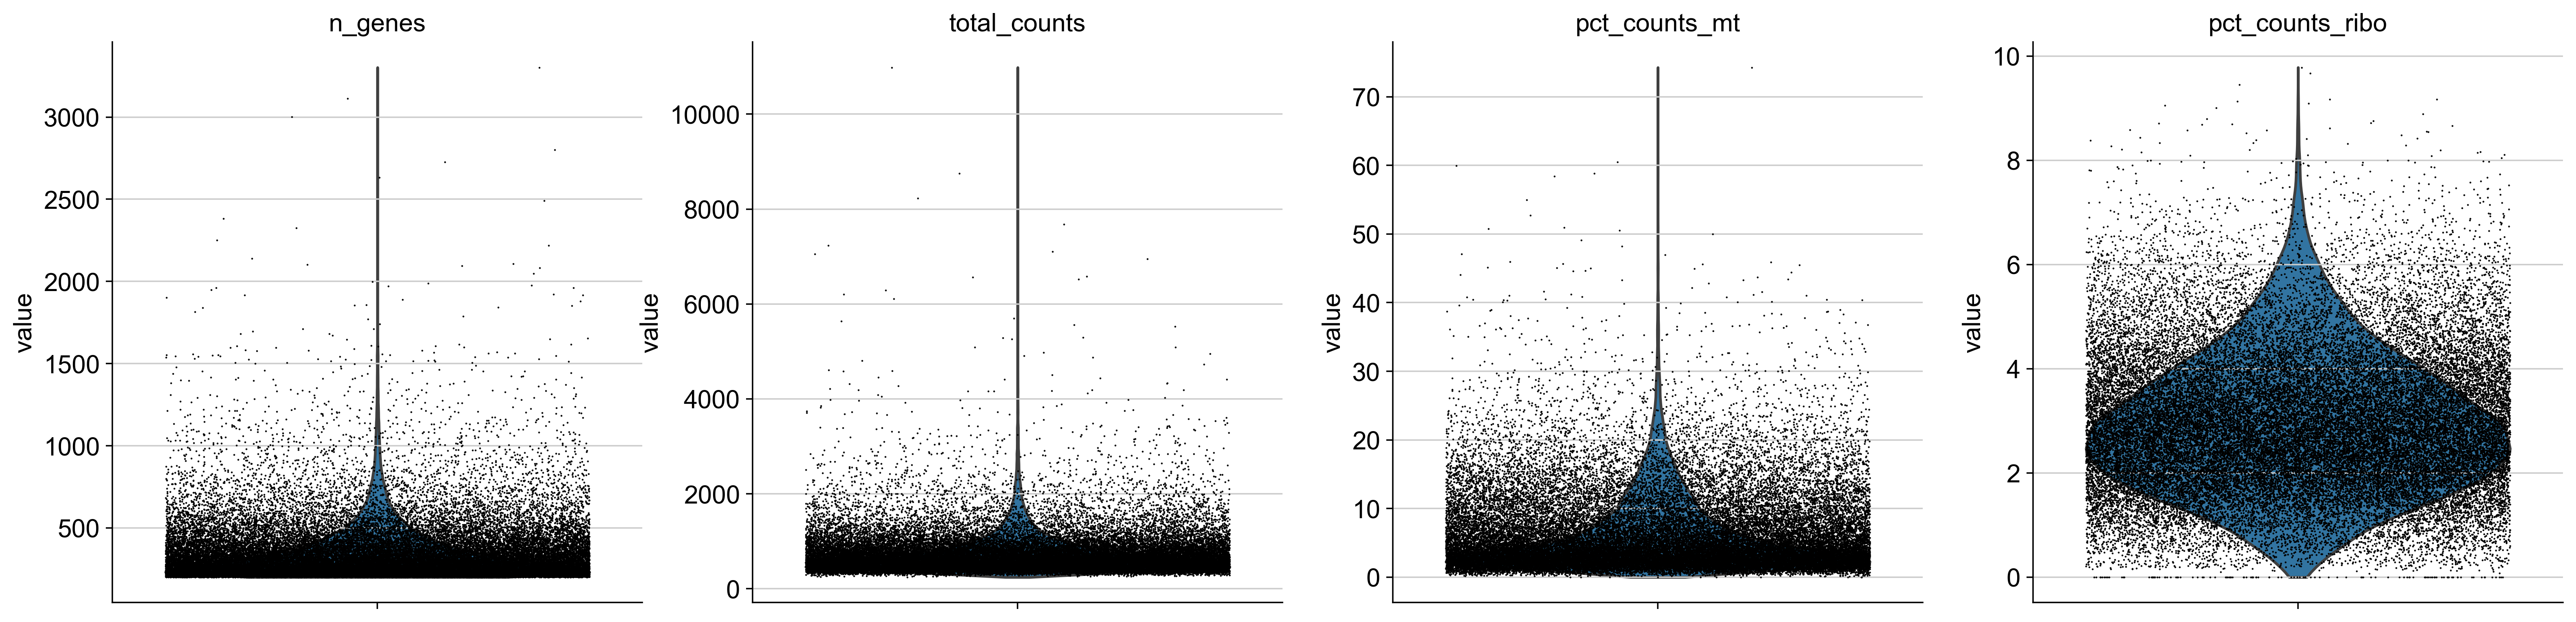

In [29]:
sc.pl.violin(sample_object, ['n_genes', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'],
             jitter=0.4, multi_panel=True)

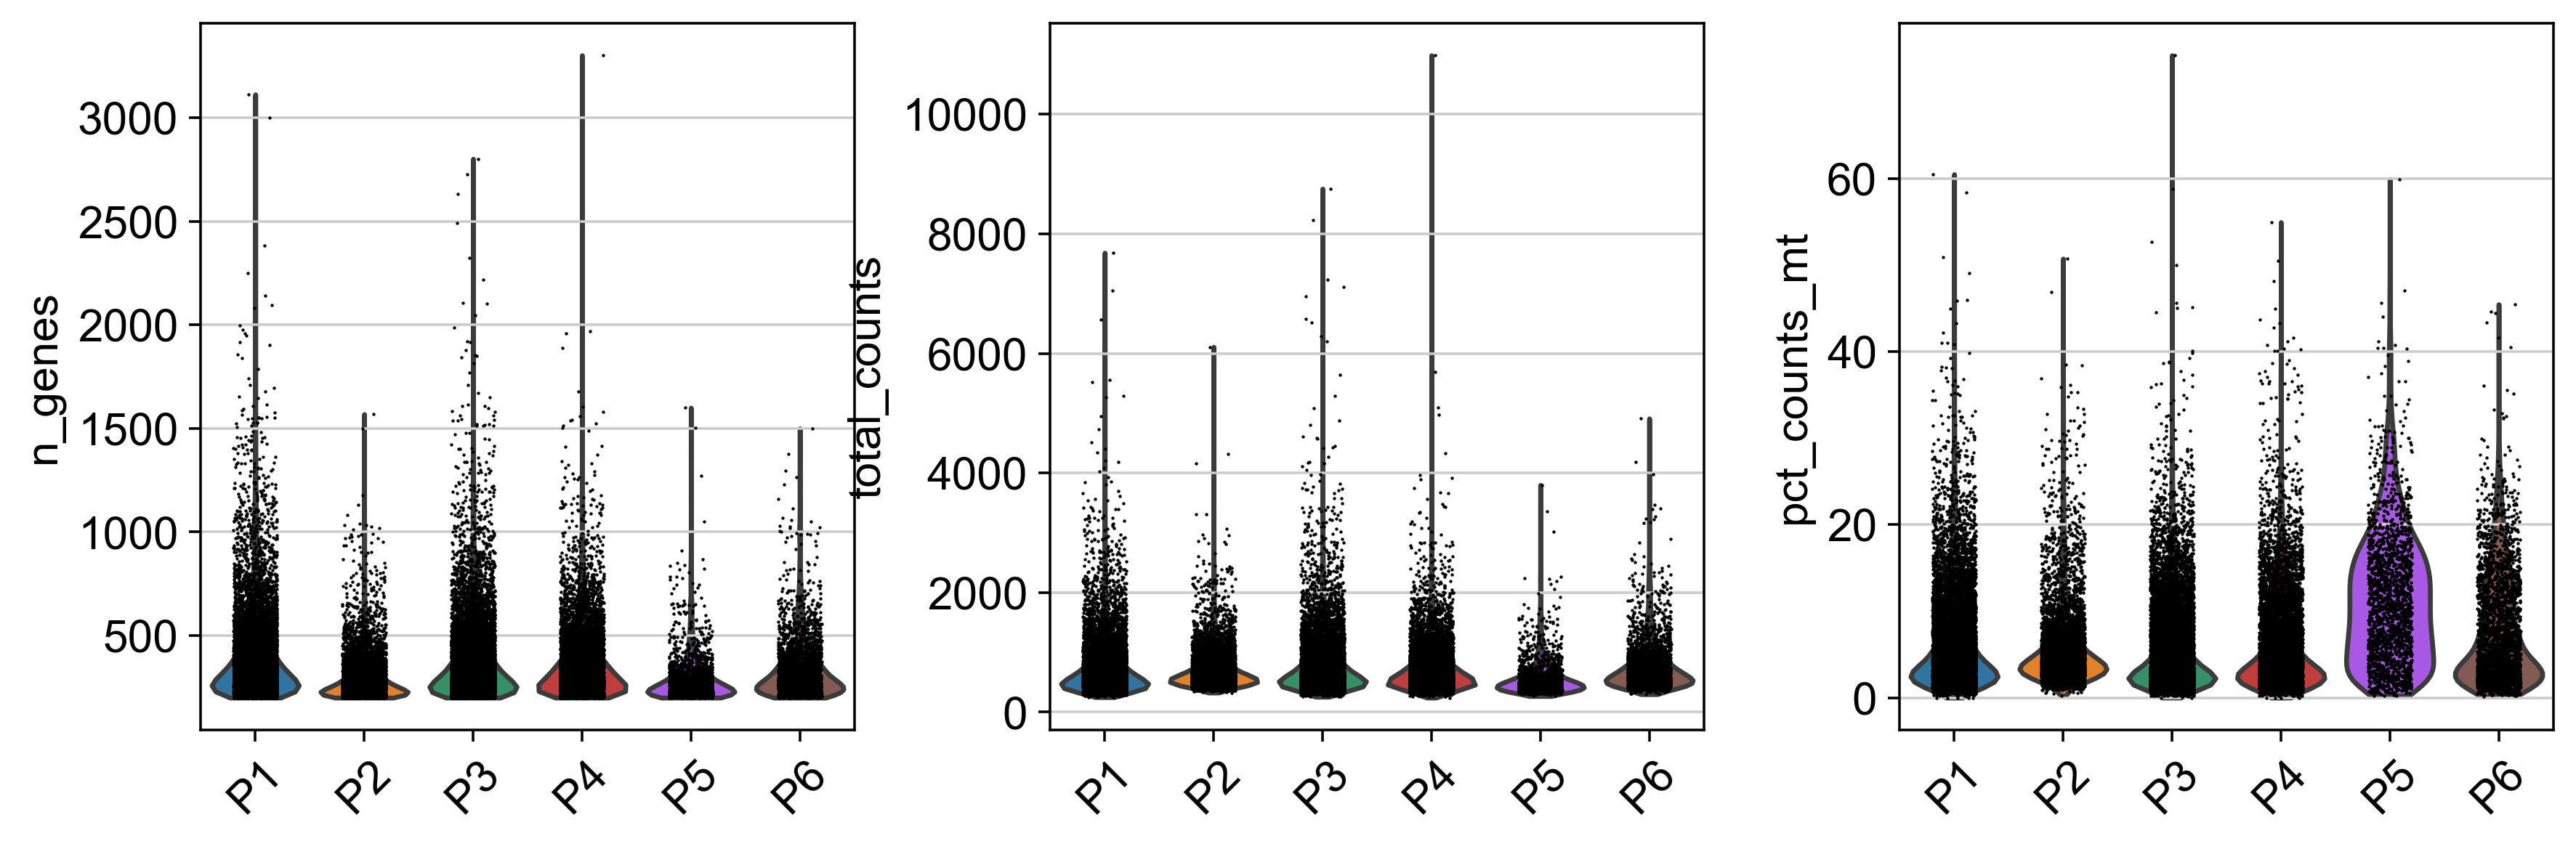

In [30]:
sc.pl.violin(sample_object, ['n_genes', 'total_counts', 'pct_counts_mt'],
             jitter = 0.2, groupby = 'donor', rotation = 45)

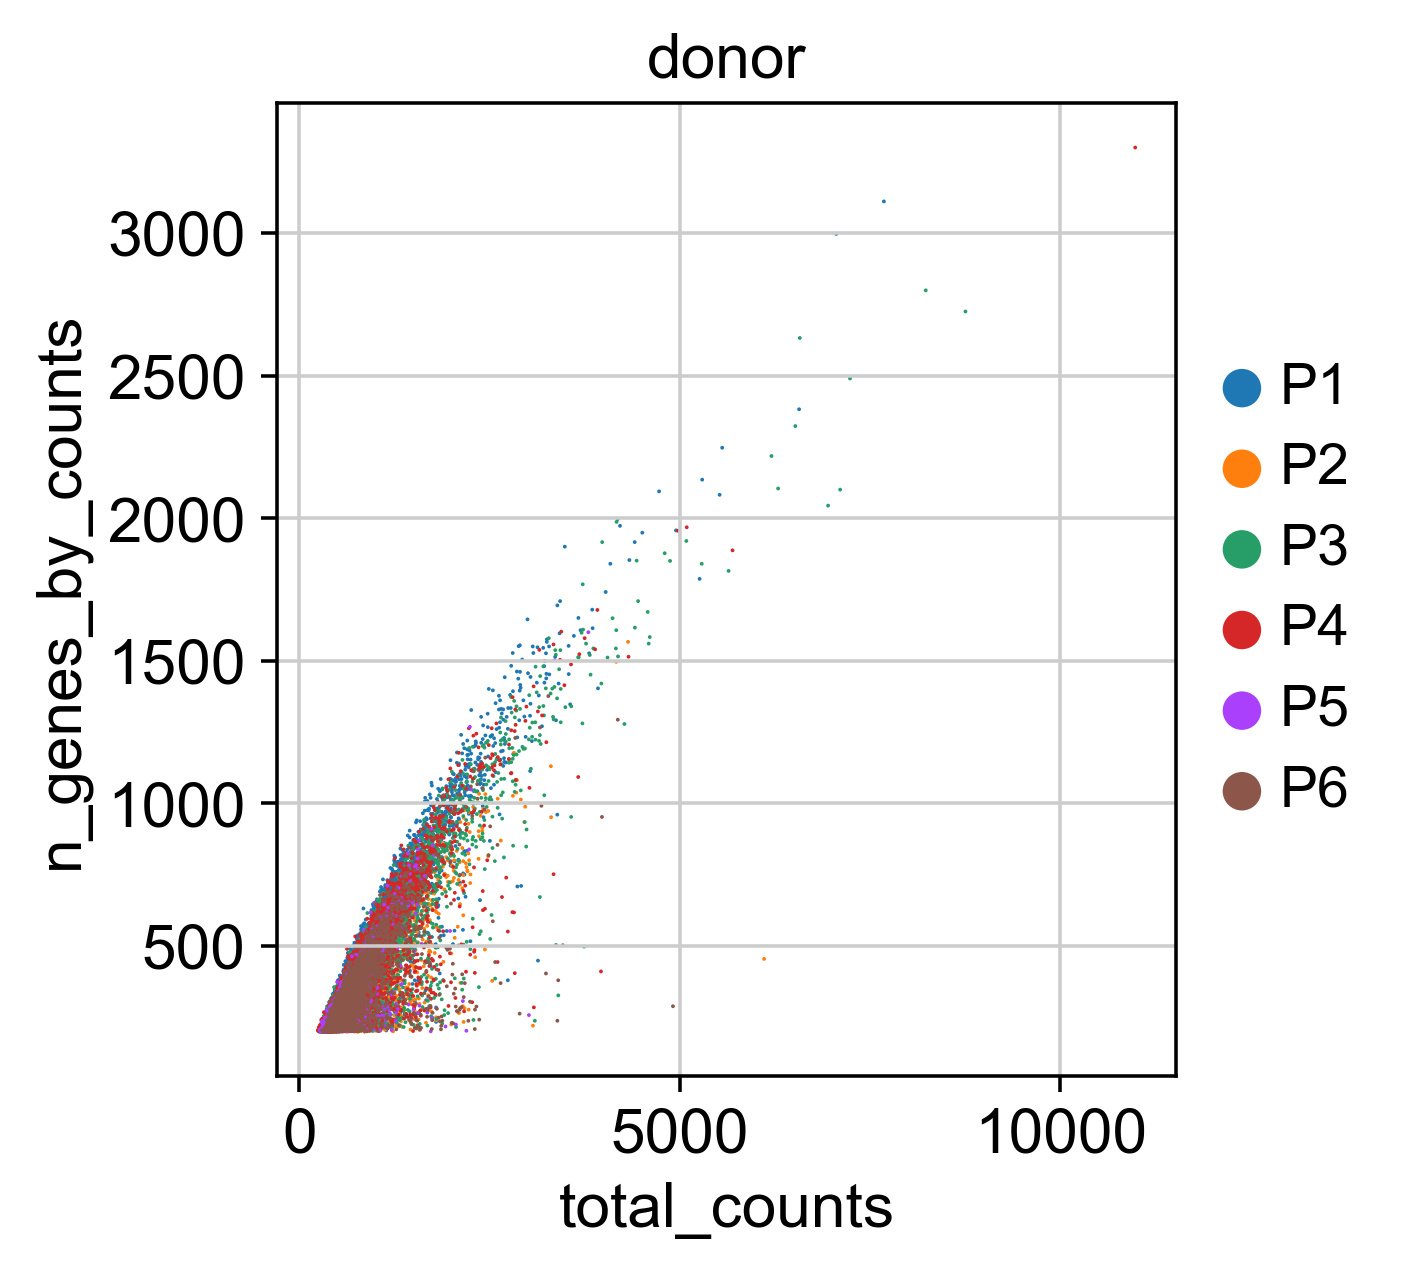

In [31]:
sc.pl.scatter(sample_object, x='total_counts', y='n_genes_by_counts', color = "donor")

### Add sample sex covariate

In [32]:
annot = sc.queries.biomart_annotations(
        "hsapiens",
        ["ensembl_gene_id", "external_gene_name", "start_position", "end_position", "chromosome_name"],
    ).set_index("external_gene_name")

In [33]:
annot.head()

ensembl_gene_id  start_position  end_position  \
external_gene_name                                                  
MT-TF               ENSG00000210049             577           647   
MT-RNR1             ENSG00000211459             648          1601   
MT-TV               ENSG00000210077            1602          1670   
MT-RNR2             ENSG00000210082            1671          3229   
MT-TL1              ENSG00000209082            3230          3304   

                   chromosome_name  
external_gene_name                  
MT-TF                           MT  
MT-RNR1                         MT  
MT-TV                           MT  
MT-RNR2                         MT  
MT-TL1                          MT

- Y chrom

In [34]:
chrY_genes = sample_object.var_names.intersection(annot.index[annot.chromosome_name == "Y"])
chrY_genes

Index(['Y_RNA', 'XGY2', 'RPS4Y1', 'HSFY3P', 'ZFY', 'ZFY-AS1', 'LINC00278',
       'PCDH11Y', 'PRKY', 'RN7SKP282', 'RFTN1P1', 'ZNF736P9Y', 'LINC00279',
       'USP9YP4', 'RBMY2QP', 'SNX18P1Y', 'GYG2P1', 'USP9Y', 'CDY4P', 'DDX3Y',
       'CASKP1', 'DPPA2P1', 'UTY', 'PSMA6P1', 'ANOS2P', 'NLGN4Y', 'NLGN4Y-AS1',
       'TTTY14', 'ZNF839P1', 'BCORP1', 'TXLNGY', 'KDM5D', 'TTTY10', 'EIF1AY',
       'HSFY4P', 'USP9YP3', 'RBMY2FP'],
      dtype='object')

In [35]:
sample_object.obs['percent_chrY'] = np.sum(
    sample_object[:, chrY_genes].X, axis = 1).A1 / np.sum(sample_object.X, axis = 1).A1 * 100

- X chrom

In [36]:
chrX_genes = sample_object.var_names.intersection(annot.index[annot.chromosome_name == "X"])
chrX_genes

Index(['Y_RNA', 'Metazoa_SRP', 'GYG2', 'ARSD', 'ARSD-AS1', 'ARSL', 'ARSF',
       'RN7SL578P', 'LINC01546', 'PRKX',
       ...
       'FUNDC2', 'CMC4', 'MTCP1', 'BRCC3', 'VBP1', 'RAB39B', 'CLIC2',
       'TMLHE-AS1', 'TMLHE', 'SPRY3'],
      dtype='object', length=768)

In [37]:
sample_object.obs['percent_chrX'] = np.sum(
    sample_object[:, chrX_genes].X, axis = 1).A1 / np.sum(sample_object.X, axis = 1).A1 * 100

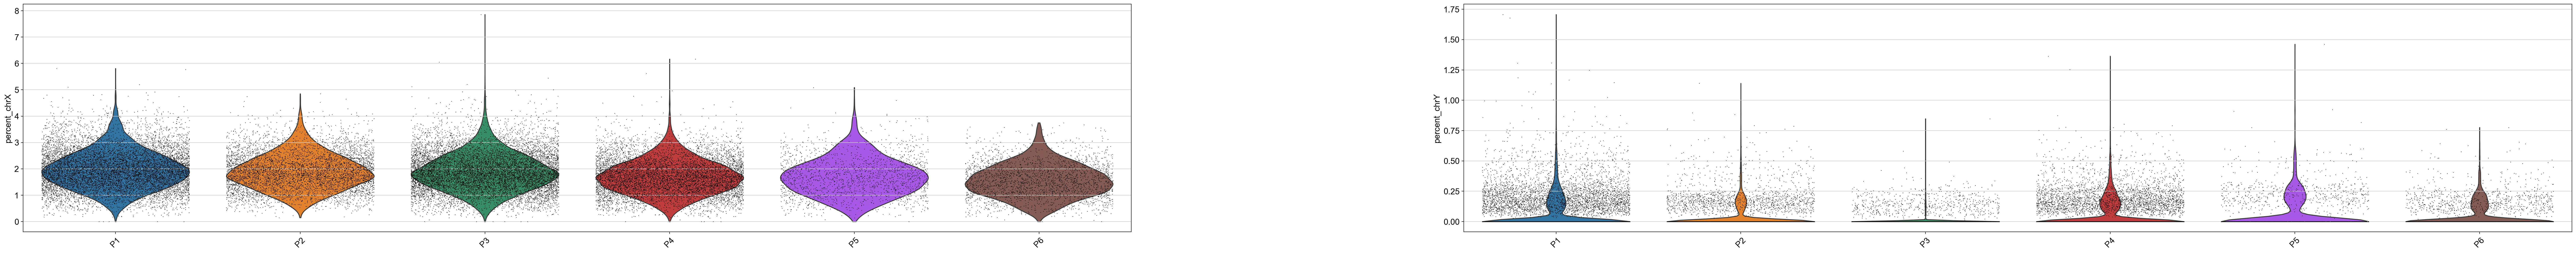

In [38]:
sc.set_figure_params(figsize=(25, 7),dpi=100)
sc.pl.violin(sample_object, ["percent_chrX", "percent_chrY"], jitter = 0.4, groupby = 'donor', rotation = 45)

### Calculate cell cycle scores

In [39]:
!if [ ! -f /Users/mairi.mcclean/cell_cycle_gene.txt ]; then curl -o /Users/mairi.mcclean/cell_cycle_gene.txt https://raw.githubusercontent.com/theislab/scanpy_usage/master/180209_cell_cycle/data/regev_lab_cell_cycle_genes.txt; fi

In [40]:
cell_cycle_genes = [x.strip() for x in open('/Users/mairi.mcclean/data/qc_files/cell_cycle_gene.txt')]
print(len(cell_cycle_genes))

# Split into 2 lists
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

cell_cycle_genes = [x for x in cell_cycle_genes if x in sample_object.var_names]
print(len(cell_cycle_genes))

97
94


- Create basic `anndata` for score calculation

In [41]:
adata_log = anndata.AnnData(X = sample_object.X,  var = sample_object.var, obs = sample_object.obs)
sc.pp.normalize_total(adata_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata_log)

normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['ENSG00000288934', 'IGKV3-15', 'IGKV3-20', 'ENSG00000286848', 'ENSG00000248223', 'CD74', 'H1-4', 'ENSG00000230521', 'ENSG00000227766', 'ENSG00000271581', 'ACTB', 'ENSG00000243004', 'ENSG00000272256', 'ENSG00000203396', 'VIM-AS1', 'MALAT1', 'BTG1-DT', 'HELLPAR', 'HSP90B1', 'TPT1', 'ENSG00000273149', 'IGHA2', 'IGHG2', 'IGHA1', 'IGHG1', 'ENSG00000266865', 'ENSG00000267598', 'ENSG00000283907', 'BCAS4', 'PRAMENP', 'IGLV1-44', 'IGLV1-40', 'MIF-AS1', 'XACT', 'ENSG00000225840', 'MT-RNR1', 'MT-RNR2', 'MT-CO1', 'MT-CO2']
    finished (0:00:00)


In [42]:
sample_object.var

gene_id  n_cells     mt   ribo     hb  \
DDX11L1          ENSG00000223972.5        5  False  False  False   
WASH7P           ENSG00000227232.5       27  False  False  False   
ENSG00000238009  ENSG00000238009.6       31  False  False  False   
CICP27           ENSG00000233750.3      290  False  False  False   
ENSG00000241860  ENSG00000241860.7      580  False  False  False   
...                            ...      ...    ...    ...    ...   
MT-ND6           ENSG00000198695.2    18635   True  False  False   
MT-TE            ENSG00000210194.1      740   True  False  False   
MT-CYB           ENSG00000198727.2    22356   True  False  False   
MT-TT            ENSG00000210195.2       44   True  False  False   
MT-TP            ENSG00000210196.2     3467   True  False  False   

                 n_cells_by_counts  mean_counts  pct_dropout_by_counts  \
DDX11L1                          5     0.000122              99.987847   
WASH7P                          27     0.000656              99.934375   
ENSG00000238009                 31     0.000753              99.924653   
CICP27                         290     0.008385              99.295141   
ENSG00000241860                580     0.015458              98.590283   
...                            ...          ...                    ...   
MT-ND6                       18635     0.763799              54.706754   
MT-TE                          740     0.019833              98.201395   
MT-CYB                       22356     1.421360              45.662689   
MT-TT                           44     0.001069              99.893056   
MT-TP                         3467     0.095059              91.573293   

                 total_counts  
DDX11L1                   5.0  
WASH7P                   27.0  
ENSG00000238009          31.0  
CICP27                  345.0  
ENSG00000241860         636.0  
...                       ...  
MT-ND6                31425.0  
MT-TE                   816.0  
MT-CYB                58479.0  
MT-TT                    44.0  
MT-TP                  3911.0  

[32603 rows x 9 columns]

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    601 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    813 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


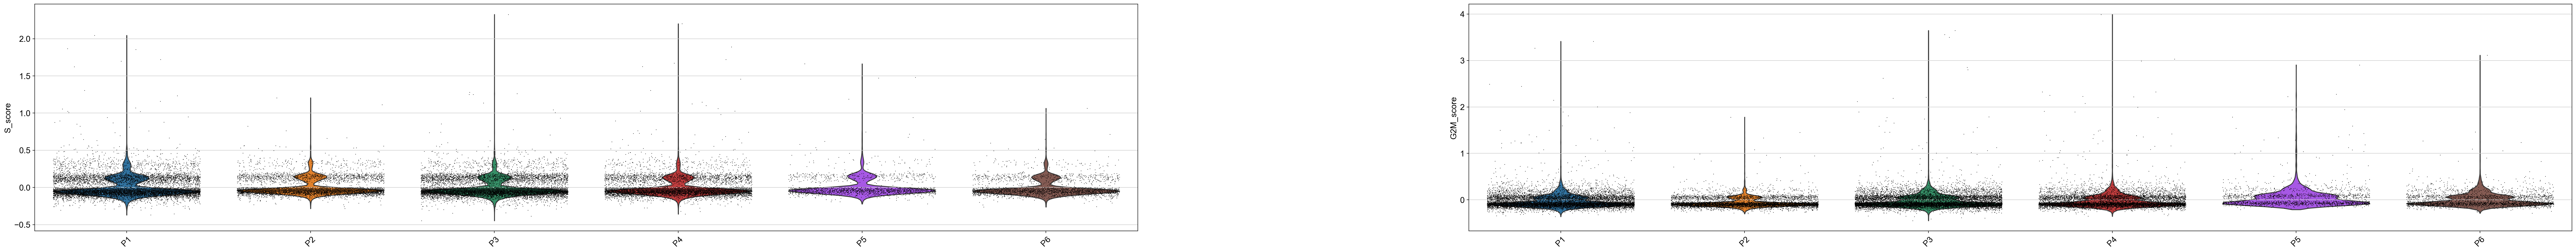

In [43]:
sc.tl.score_genes_cell_cycle(adata_log, s_genes = s_genes, g2m_genes = g2m_genes)
sc.pl.violin(adata_log, ['S_score', 'G2M_score'],
             jitter = 0.4, groupby = 'donor', rotation = 45)

In [44]:
sample_object.obs['S_score'] = adata_log.obs['S_score']
sample_object.obs['G2M_score'] = adata_log.obs['G2M_score']
sample_object

AnnData object with n_obs × n_vars = 41143 × 32603
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_chrY', 'percent_chrX', 'S_score', 'G2M_score'
    var: 'gene_id', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'donor_colors'

### Predict doublets

In [45]:
import scrublet

In [46]:
scrub = scrublet.Scrublet(sample_object.X)

Preprocessing...


/Users/mairi.mcclean/mambaforge/envs/new_scanpy_local/lib/python3.9/site-packages/scrublet/helper_functions.py:241: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/Users/mairi.mcclean/mambaforge/envs/new_scanpy_local/lib/python3.9/site-packages/scrublet/helper_functions.py:254: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.69
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 4.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 1.0%
Elapsed time: 52.2 seconds


(<Figure size 800x300 with 2 Axes>,
 array([<Axes: title={'center': 'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <Axes: title={'center': 'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

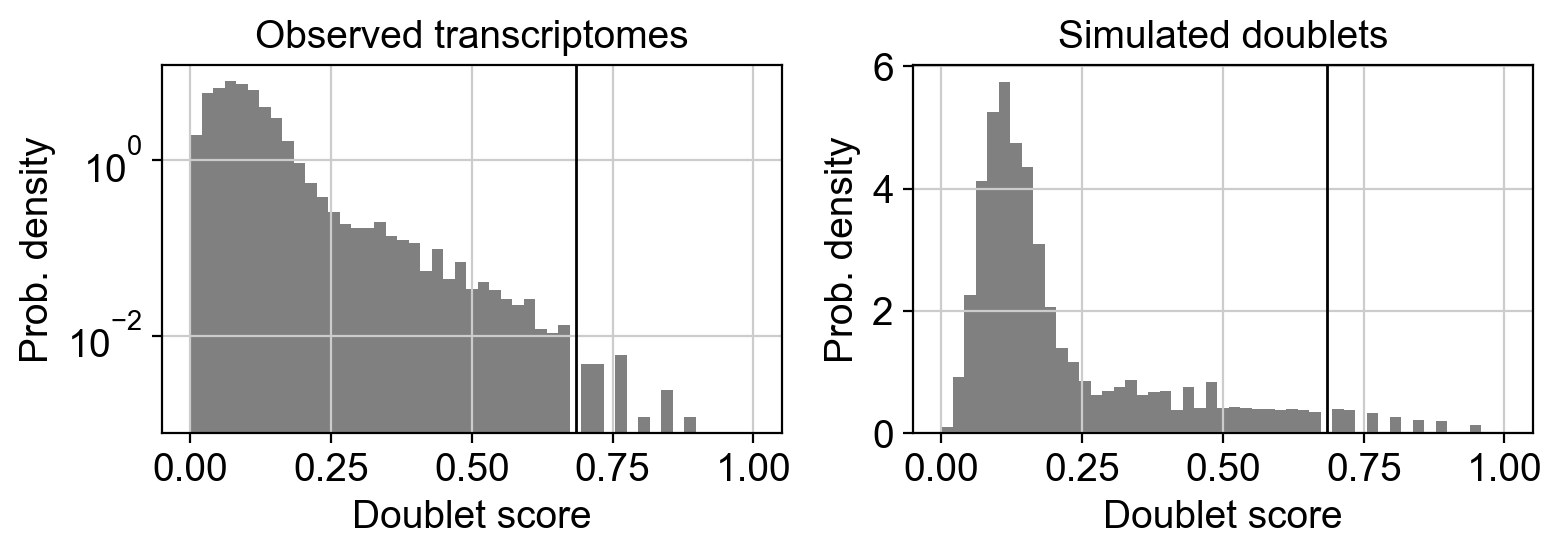

In [47]:
sample_object.obs['doublet_scores'], sample_object.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

In [48]:
sum(sample_object.obs['predicted_doublets'])

17

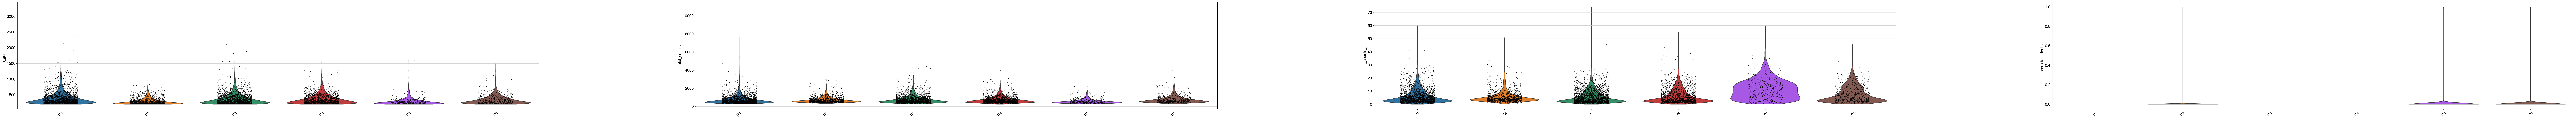

In [49]:
#check if our predicted doublets also have more detected genes in general

sc.pl.violin(sample_object, ['n_genes', 'total_counts', 'pct_counts_mt', 'predicted_doublets'],
             jitter = 0.2, groupby = 'donor', rotation = 45)

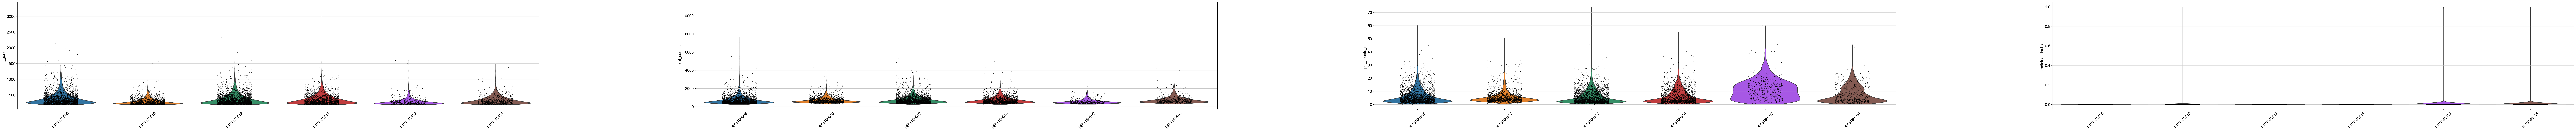

In [50]:
sc.pl.violin(sample_object, ['n_genes', 'total_counts', 'pct_counts_mt', 'predicted_doublets'],
             jitter = 0.2, groupby = 'sample', rotation = 45)

### Prepare counts for individual slots


In [51]:
sample_object.raw = sample_object.copy()
sample_object.layers['counts'] = sample_object.X.copy()
sample_object.layers["sqrt_norm"] = np.sqrt(
    sc.pp.normalize_total(sample_object, inplace = False)["X"]
)
sample_object

normalizing counts per cell


    finished (0:00:00)


AnnData object with n_obs × n_vars = 41143 × 32603
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_chrY', 'percent_chrX', 'S_score', 'G2M_score', 'doublet_scores', 'predicted_doublets'
    var: 'gene_id', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'donor_colors', 'sample_colors'
    layers: 'counts', 'sqrt_norm'

### Export object

In [52]:
sample_object.write('/Volumes/Expansion/data_lake/processed_files/qc_objects/human/cai2022/Cai2022_scrna_PFMC_mm_230609_qcd.h5ad')